<a href="https://colab.research.google.com/github/Alonment/CSCI4962-Projects-In-ML-AI/blob/main/CSCI4962_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 1: Logistic Regression Implementation**

**Task 1(10 points)**: Describe a machine learning problem that you would like to solve using Logistic Regression. Clearly state why Logistic Regression is the best choice for solving this problem.

With the advent of esports and gaming as two rapidly evolving fields, it is vital that more research and studies are conducted within these fields to maximize their potential in both monetary value and overall reach as part of the overarching entertainment industry. In particular, I will be examining the widely popular game, League of Legends, and all of the complex factors that are involved in winning a single match.

League of Legends is a MOBA (multiplayer-online-battle-arena) where 2 teams (blue vs. red) face off within a small map. The objective is to destroy the enemy's nexus in order to win the match. The actual intricacies of a single match range far and wide, with practically every match being unique in their own right.

League of Legends is easily one of the best games to analyze with respect to the esports industry as it has, historically speaking, the highest amount of viewership both in terms of total hours viewed as well as peak concurrent viewers in comparison to every other game in the industry.

[Source] https://escharts.com/blog/most-popular-esports-games-2020
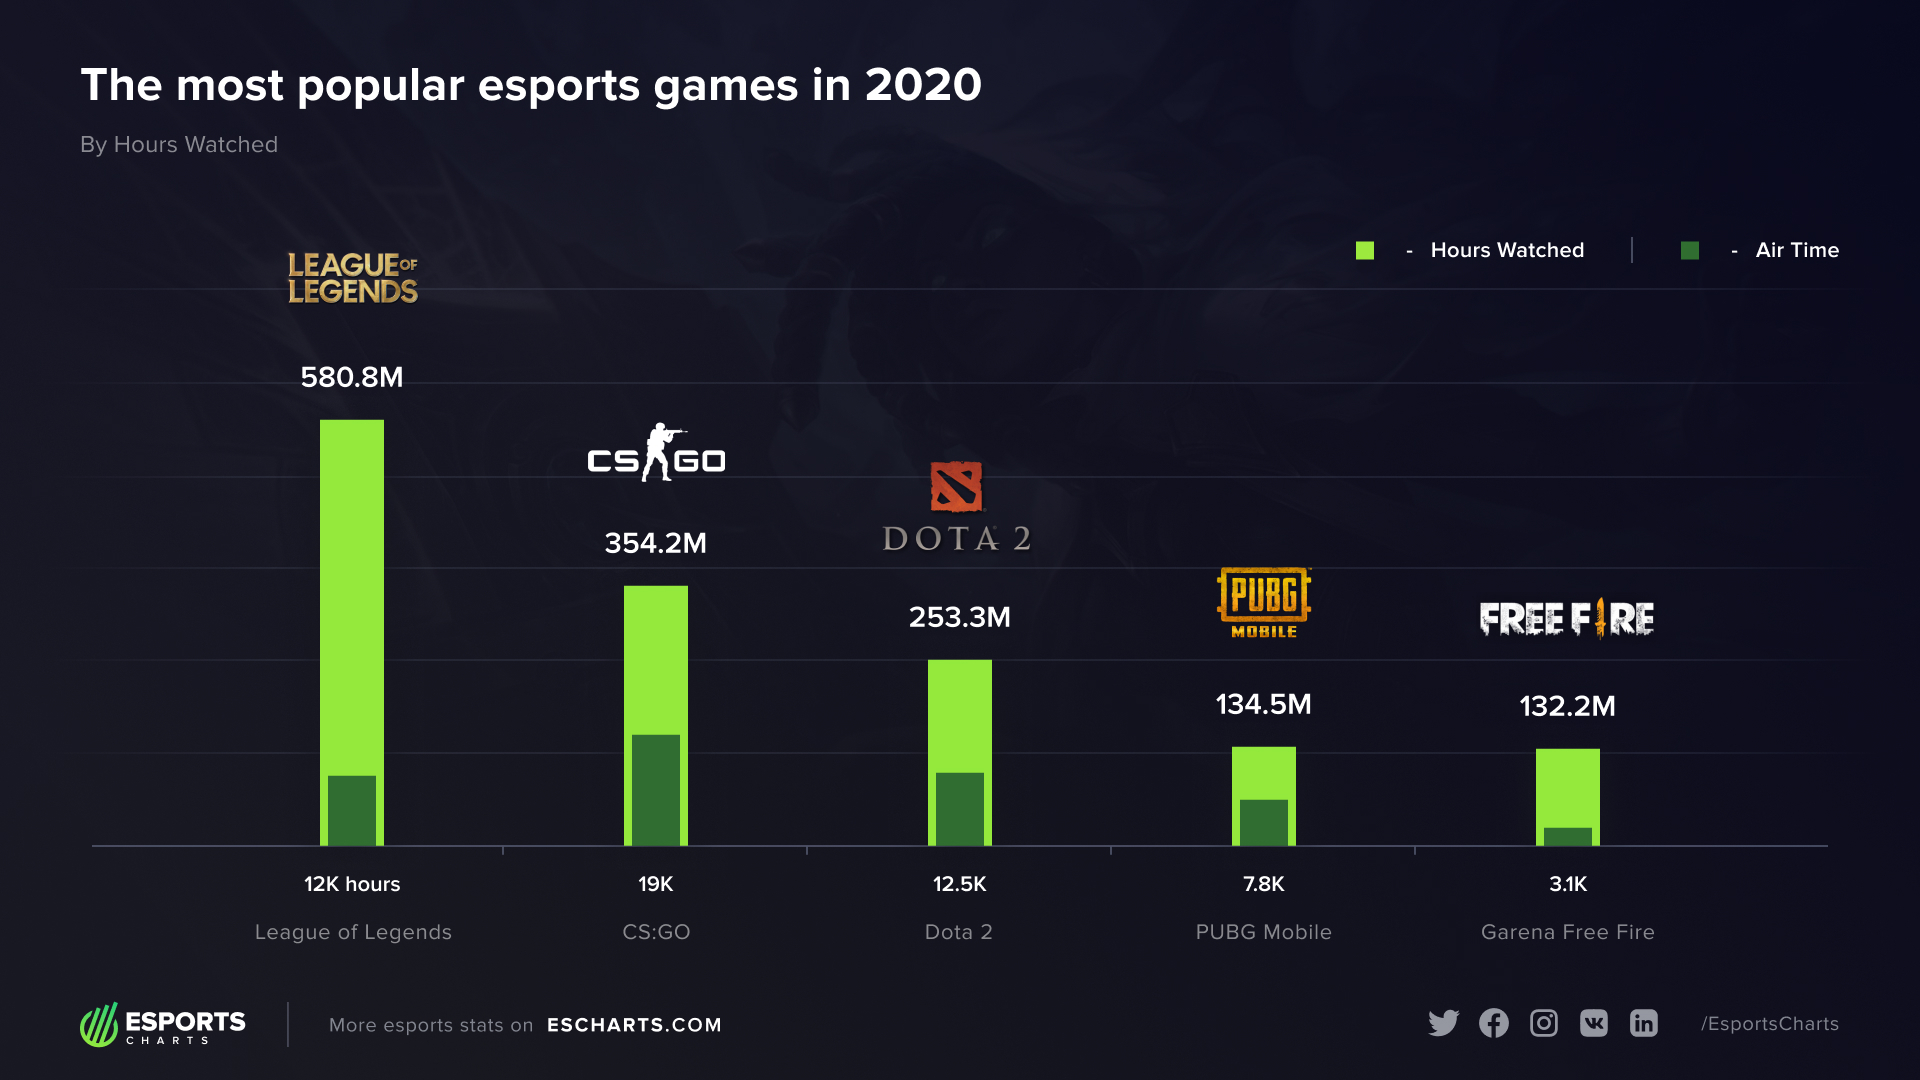



**Problem Statement:** Predict whether or not the blue team will win based off of all the in-game data available at a particular point in time.

Logistic regression is best suited for this problem since we have all of these vastly different features (gold difference, kills per team, deaths per team, wards placed, dragons killed, barons killed, total cs difference, etc.) that are all important and impactful in their own right, with all of these ultimately culminating into a single binary output, i.e. blue team wins (1) or red team wins (0).

The real value in solving such a problem is enabling current analysts, coaches, players, etc., with the data and statistics needed to formulate new strategies, especially when trying to stand out and win within an environment where countless strategies have been tried and tested for about a decade now. Specifically speaking, such a model would help players know which areas to invest their focus and practice, i.e. ignoring dragon for baron or prioritizing cs over kills.

**Task 2(20 points)**: Pick a publicly available dataset that you will use to solve this problem. You
must provide a link to the dataset and perform necessary Exploratory Data Analysis (EDA).
Clearly demonstrate the steps you follow for your EDA with a justification of why these were
required. For example, if the dataset has lot of missing values, then why did you use a specific
technique when handling missing data. 

In [1042]:
### Reading our dataset
# Link: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min
#

import pandas as pd

data = pd.read_csv('drive/MyDrive/high_diamond_ranked_10min.csv')
data.head(10)



,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,22.5,1589.9,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4,57,1,0,6,7,9,0,0,0,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,0,0,15305,6.4,16138,209,48,-2615,-800,20.9,1530.5,15,0,1,13,5,11,1,1,0,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,0,0,16401,7.2,18527,189,61,-1979,-771,18.9,1640.1,15,2,1,7,7,5,2,1,1,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,0,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7,16,2,0,5,4,4,0,0,0,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


At first glance, the data set seems to be pretty clean and uniform with nothing extreme appearing to happen. Furthermore, there appears to be a a wide spread of features representive of both teams. Before determining which features should be kept and which should be discarded, we should check for any empty/NaN values as well as statistics regarding each feature.

In [1043]:
data.isna()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9875,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9876,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9877,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [1044]:
data.nunique()

gameId                          9879
blueWins                           2
blueWardsPlaced                  147
blueWardsDestroyed                27
blueFirstBlood                     2
blueKills                         21
blueDeaths                        21
blueAssists                       30
blueEliteMonsters                  3
blueDragons                        2
blueHeralds                        2
blueTowersDestroyed                5
blueTotalGold                   4739
blueAvgLevel                      17
blueTotalExperience             4143
blueTotalMinionsKilled           148
blueTotalJungleMinionsKilled      74
blueGoldDiff                    6047
blueExperienceDiff              5356
blueCSPerMin                     148
blueGoldPerMin                  4739
redWardsPlaced                   151
redWardsDestroyed                 25
redFirstBlood                      2
redKills                          21
redDeaths                         21
redAssists                        28
r

In [1045]:
data.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


**Analysis of Column Statistics**

Given that there are no empty/NaN values and there appears to be a decent, realistic spread of values within each column, the dataset appears to have already been processed and cleaned accordingly. Furthermore, the values that are near even - 50% (i.e. blueWins = .499038, blueFirstBlood = 0.5, etc.) are also a good indicator of the "validity" of each row. This is because all of the rows in our dataset come from Diamond+ level lobbies, meaning that the players in all of these games have a very good understanding of the game and leave very little room for chance in whatever happens in the game, therefore reducing the severity of outlying values and the effect of randomness on the data.

**Removing Outliers**

With all that being said, its about time we cleaned the data set.
Out of all the columns, the only thing that seems to be potentially outlying is that of the max value for the wardsPlaced column in each respective team. We can begin by setting a bound on it to a more realistic value based off the fact that all of these rows are simply snapshots of the match 10 minutes after they start.

In [1046]:
cleaned_data = data.copy()
cleaned_data = cleaned_data[cleaned_data["blueWardsPlaced"] < 75]
cleaned_data = cleaned_data[cleaned_data["redWardsPlaced"] < 75]
cleaned_data.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.331000e+03,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000
mean,4.500051e+09,0.501232,19.837424,2.825849,0.505841,6.177151,6.125924,6.651591,0.550423,0.363198,0.187225,0.050691,16496.744615,6.913664,17920.418176,216.732290,50.498125,13.088093,-36.716322,21.673229,1649.674461,20.044261,2.735720,0.494159,6.125924,6.177151,6.663380,0.572179,0.413139,0.159040,0.043082,16483.656521,6.923952,17957.134498,217.468331,51.320223,-13.088093,36.716322,21.746833,1648.365652
std,2.762364e+07,0.500025,10.300732,2.178527,0.499993,3.006605,2.938254,4.067837,0.625557,0.480947,0.390113,0.243021,1532.379912,0.304445,1200.943094,21.891727,9.918460,2456.576372,1922.516627,2.189173,153.237991,10.691197,2.159758,0.499993,2.938254,3.006605,4.072121,0.627021,0.492424,0.365733,0.217331,1494.519195,0.305960,1200.685955,21.950191,10.045124,2456.576372,1922.516627,2.195019,149.451919
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,8.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483134e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15406.000000,6.800000,17151.500000,202.000000,44.000000,-1594.000000,-1294.500000,20.200000,1540.600000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15420.500000,6.800000,17205.000000,203.000000,44.000000,-1599.500000,-1215.000000,20.300000,1542.050000
50%,4.510943e+09,1.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16388.000000,7.000000,17940.000000,218.000000,50.000000,14.000000,-29.000000,21.800000,1638.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16368.000000,7.000000,17967.000000,218.000000,51.000000,-14.000000,29.000000,21.800000,1636.800000
75%,4.521720e+09,1.000000,19.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17456.500000,7.200000,18718.000000,232.000000,56.000000,1599.500000,1215.000000,23.200000,1745.650000,19.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17412.000000,7.200000,18760.000000,233.000000,57.000000,1594.000000,1294.500000,23.300000,1741.200000
max,4.527960e+09,1.000000,74.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,74.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


As you can see, the total amount of rows in the dataset has barely decreased while the max value for the blueWardsPlaced columns has decreased significantly. The basis for setting the bound to 75 is founded both on vast personal experience as well as pure number crunching in regards to what players would have to do in order to place such an unfruitful, and even potentially harmful amount of wards.

**Discarding Unnecessary/Redundant Columns**

Firstly, the gameID column can be safely removed as it is merely an identifier and gives us no information as to what occurred during the match. 

A good amount of the features present in this dataset have information regarding differences in column values between teams as well as other redundancies (i.e. blueGoldDiff = -redGoldDiff versus totalBlueGold and totalRedGold). Thus, I will omit columns where information appears to be redundant, i.e. a positive blueGoldDiff indicates a negative redGoldDiff and vice versa.

In [1047]:
cleaned_data = cleaned_data.drop(["blueTotalGold", "redTotalGold", "redGoldDiff", "blueTotalExperience",
                   "redTotalExperience", "redExperienceDiff", "blueAvgLevel", "redAvgLevel",
                   "gameId", "blueFirstBlood", "redFirstBlood"], axis=1)
cleaned_data

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,0,28,2,9,6,11,0,0,0,0,195,36,643,-8,19.5,1721.0,15,6,6,9,8,0,0,0,0,197,55,19.7,1656.7
1,0,12,1,5,5,5,0,0,0,0,174,43,-2908,-1173,17.4,1471.2,12,1,5,5,2,2,1,1,1,240,52,24.0,1762.0
2,0,15,0,7,11,4,1,1,0,0,186,46,-1172,-1033,18.6,1611.3,15,3,11,7,14,0,0,0,0,203,28,20.3,1728.5
3,0,43,1,4,5,5,1,0,1,0,201,55,-1321,-7,20.1,1515.7,15,2,5,4,10,0,0,0,0,235,47,23.5,1647.8
5,1,18,0,5,3,6,1,1,0,0,225,42,698,101,22.5,1589.9,36,5,3,5,2,0,0,0,0,221,59,22.1,1520.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,7,4,5,1,1,0,0,211,69,2519,2469,21.1,1776.5,46,3,4,7,7,0,0,0,0,229,34,22.9,1524.6
9875,1,54,0,6,4,8,1,1,0,0,233,48,782,888,23.3,1623.8,12,21,4,6,3,0,0,0,0,206,56,20.6,1545.6
9876,0,23,1,6,7,5,0,0,0,0,210,45,-2416,-1877,21.0,1590.3,14,0,7,6,11,1,1,0,0,261,60,26.1,1831.9
9877,0,14,4,2,3,3,1,1,0,0,224,48,-839,-1085,22.4,1445.9,66,4,3,2,1,0,0,0,0,247,40,24.7,1529.8


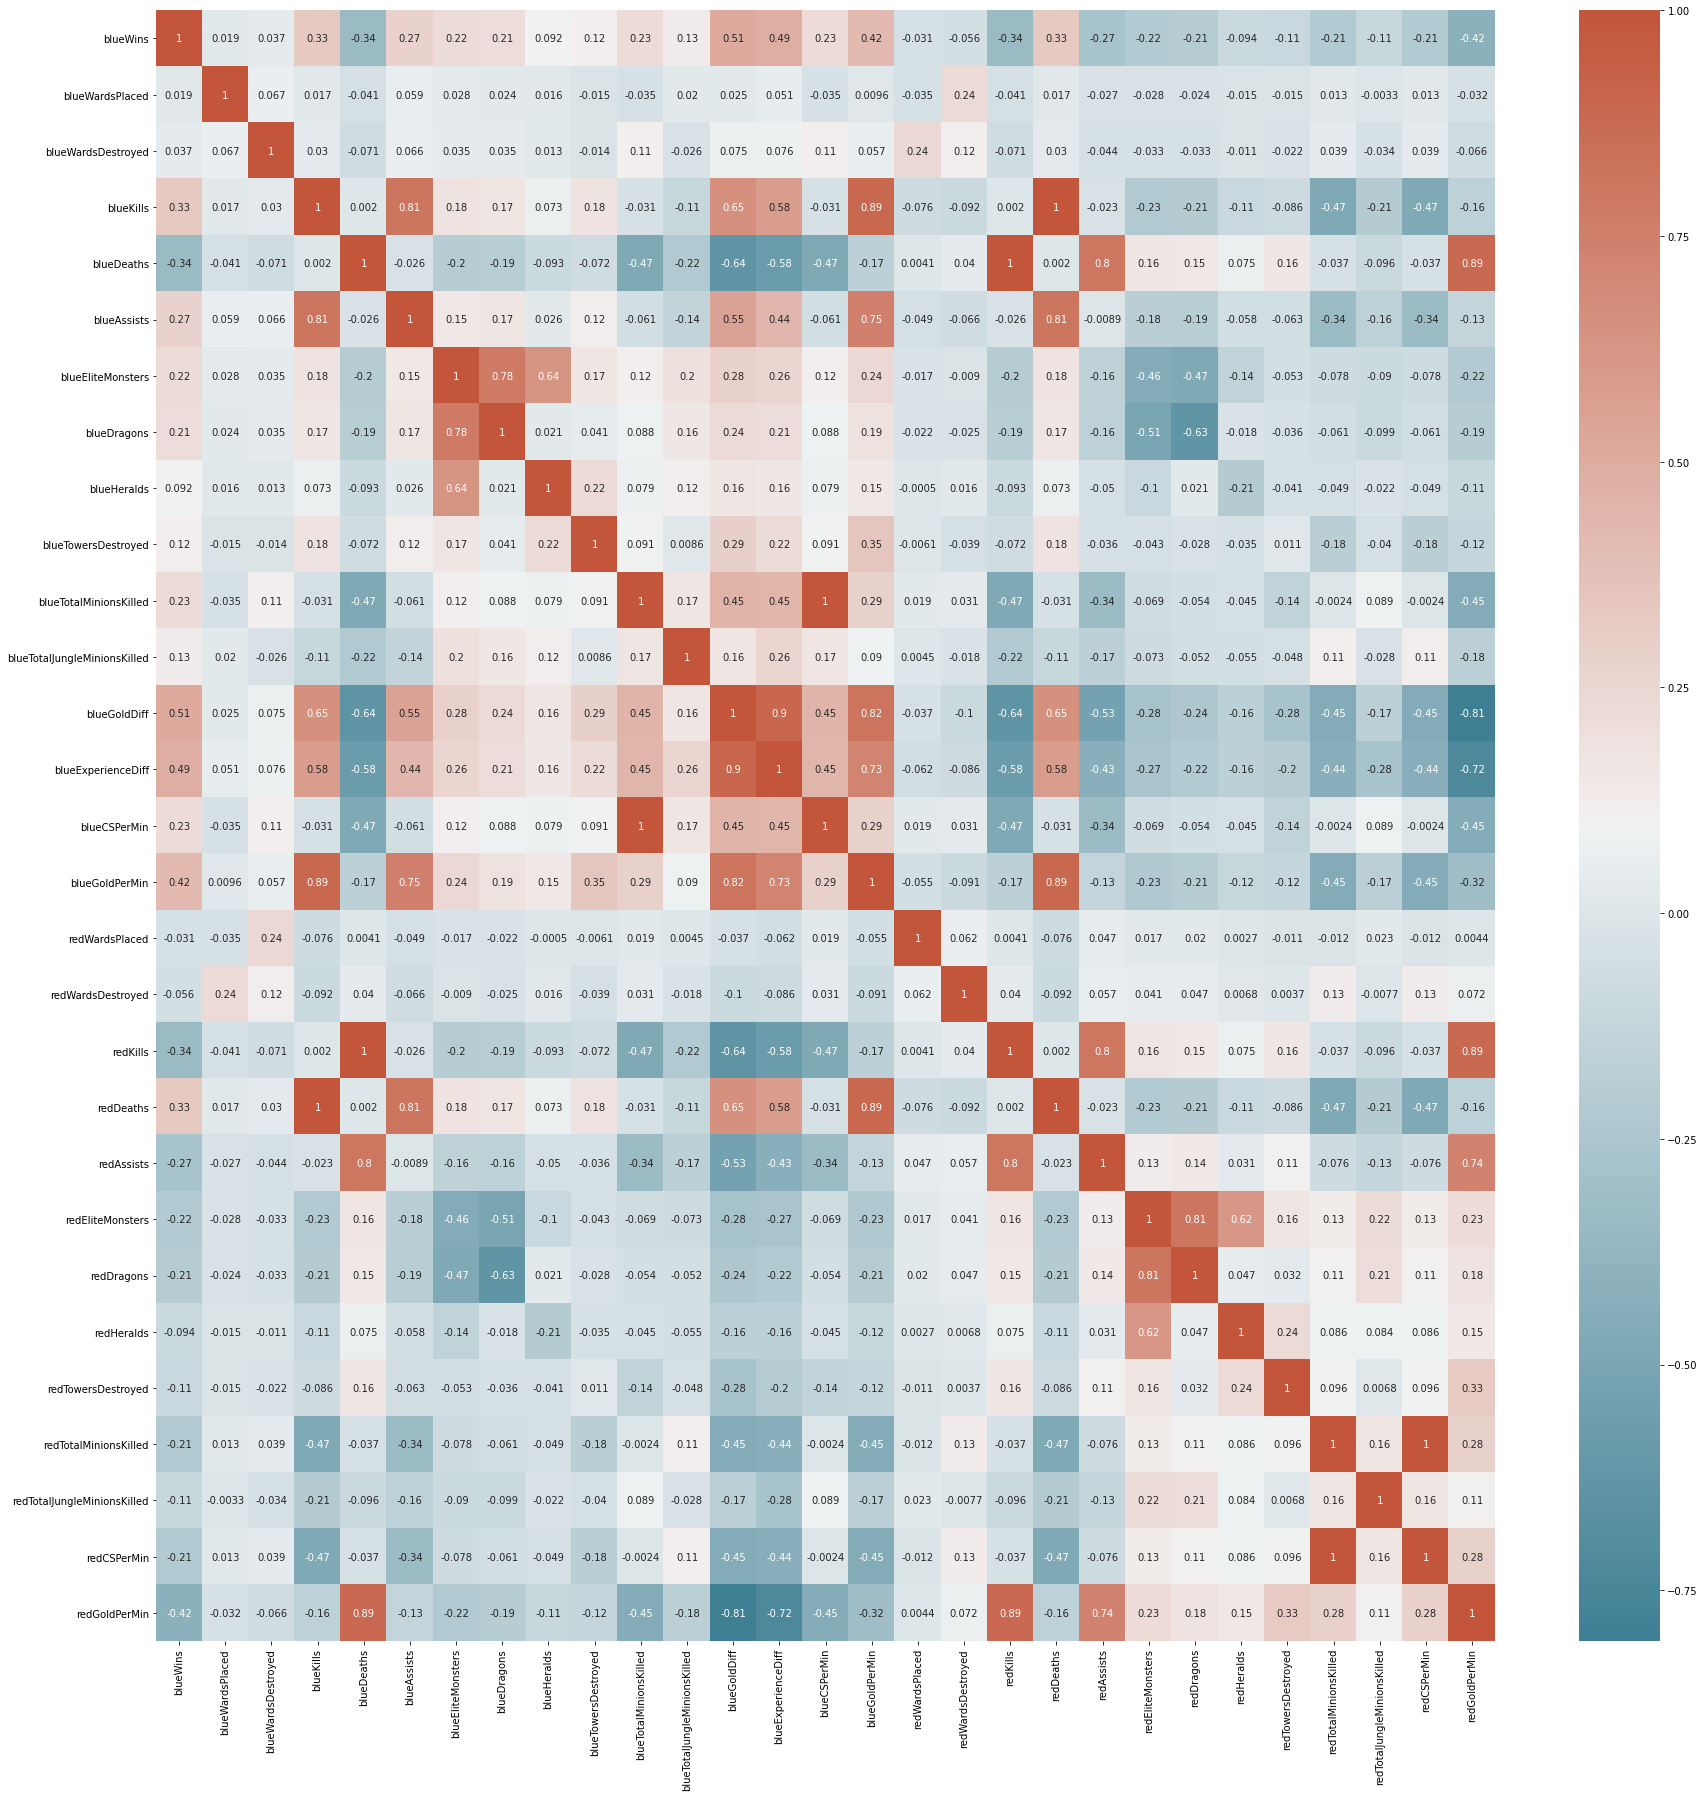

In [1048]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize = (30,30))
corr = cleaned_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

**Analysis of the Cleaned Data**

Upon examining the correlation matrix, every correlation appears to be as expected. For example, there is a strong positive correlation between blueGoldDiff and blueExperienceDiff. This is indicative of quite a few things: the more gold a team has relative to their enemy, the stronger they are and the more likely they are to increase that lead. In this specific case of goldDiff vs experienceDiff, clearly as the blueGoldDiff increases, the blue team themselves are stronger and thus able to deny more experience from the enemy team. The same logic easily applies to the strong positive correlation between blueGoldDiff and redDeaths - i.e since the blue team has more gold, they are therefore stronger than the red team and thus more likely to kill them. 

Below are some scatterplots to further demonstrate just exactly how each feature is typically associated with one another.

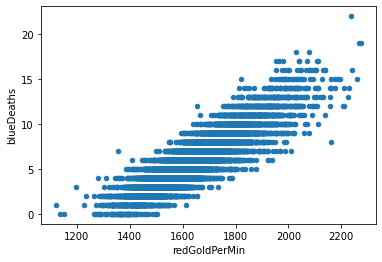

In [1049]:
cleaned_data.plot(kind='scatter', x='redGoldPerMin', y='blueDeaths')

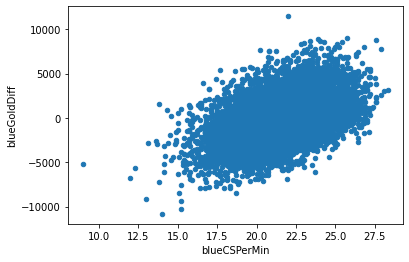

In [1050]:
cleaned_data.plot(kind='scatter', x='blueCSPerMin', y='blueGoldDiff')

These scatterplots display a much clearer picture of our data and how each feature interacts with one another as expected. As the red team continue to increase their goldPerMin, the blue team tend to experience more deaths, thus indicating that the red team is getting stronger and stronger in comparison to the blue team. In regards to blueCSPerMin versus blueGoldDiff, its clear that a CSPerMin value of between 20.0 and 22.5 tends to indicate equality in the strength of both teams while anything outside of that typically tips it in favor of a specific team - i.e. if the blue team has a high blueCSPerMin value, they will have a positive goldDiff value thus indicating their superiority in strength.

**Task 3(35 points)**: Implement Logistic Regression in this step. Clearly write your cost function and derivatives before implementing gradient descent. Do not use any built-in packages for this step. You can use the vectorization techniques demonstrated in class. Implement any 2 variants of gradient descent in their original form. (Refer to the research paper discussed in class)

Prediction: $\hat{y} = \sigma(w^Tx + b)$

Loss Function: $l^i(y^{(i)}, \hat{y}) = -(y^{(i)}\log\hat{y}^{(i)} + (1-y^{(i)})\log (1-\hat{y}^{(i)})$

Cost Function: $L(y, \hat{y})= \frac{1}{n}\sum\limits_{i=1}^nl^i(y^{(i)}, \hat{y}^{(i)})$

Sigmoid: $\sigma (a) = \frac{1}{1 + e^{-a}}$ where $a = w^Tx + b$

Derivatives:

$\frac{\partial L}{\partial b} = \frac{1}{n}\sum\limits_{i=1}^n (a^{(i)}-y^{(i)})$

Now, finding the derivative of $L$ w.r.t our parameters.

$\frac{d\sigma}{da} = \frac{e^{-a}}{(1+e^{-a})^2} = \sigma(a)(1-\sigma(a))$

$\frac{\partial L}{\partial w} = -\frac{1}{n}\sum\limits_{i=1}^n y^{(i)}\cdot \frac{1}{\hat{y}^{(i)}}\cdot \frac{\partial \hat{y}^{(i)}}{\partial w} + (1 - y^{(i)}) \cdot \frac{1}{1-\hat{y}^{(i)}}\cdot -\frac{\partial ( 1- \hat{y}^{(i)})}{\partial w} =$

$-\frac{1}{n}\sum\limits_{i=1}^ny^{(i)}\cdot \frac{1}{\hat{y}^{(i)}} \cdot \sigma(w^Tx+b)(1-\sigma(w^Tx + b))\frac{\partial (w^Tx + b)}{\partial w} + (1 - y^{(i)})\cdot \frac{1}{1-\hat{y}^{(i)}} \cdot - \sigma(w^Tx + b)(1 - \sigma(w^Tx + b)) \frac{\partial(w^Tx + b)}{\partial w}$ = 

$-\frac{1}{n}\sum\limits_{i=1}^ny^{(i)}(1-\hat{y}^{(i)})x^{(i)} + (1-y^{(i)}) \cdot -\hat{y}^{(i)}x^{(i)} = -\frac{1}{n}\sum\limits_{i=1}^n(y^{(i)} - \hat{y}^{(i)})x^{(i)}$

Thus, $\frac{\partial L}{\partial w} = \frac{(\hat{y} - y)^T \cdot x}{n} = \frac{(a-y)^T\cdot x}{n}$

Now, with all of our functions and derivatives out of the way, its time to implement our model.

In [1051]:
#Import necessary libraries 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(0)

def sigmoid(a):
    return 1/(1+np.exp(-a))

def loss(Y, A):
  return Y * np.log(A) + (1-Y) * np.log(1-A)

def model(X, Y, variant, epochs=1000, learning_rate=0.001):
  
  # Initialize our weights to a random vector and bias to a random integer in [-1, 1]
  w = np.random.randn(len(X[0])).T
  b = np.random.randint(-1,2)
  n = X.shape[0]

  # Batch Gradient Descent
  if variant == "BGD":
    for _ in range(epochs):

      X, Y = shuffle(X, Y)

      A = sigmoid(np.dot(w, X.T) + b)
      cost = -1/n * np.sum(loss(Y, A))
      dw = np.dot(X.T, (A-Y).T)/n
      db = np.sum(A-Y)/n
      
      # Update parameters based on gradients
      w = w - learning_rate * dw
      b = b - learning_rate * db

  # Stochastic Gradient Descent
  elif variant == "SGD":
    for _ in range(epochs):

      X, Y = shuffle(X, Y)
      for i in range(len(X)):

        A = sigmoid(np.dot(w, X[i].T) + b)
        #cost = -1/n * np.sum(loss(Y[i], A))
        dw = np.dot(X[i].T, (A-Y[i]).T)/n
        db = np.sum(A-Y[i])/n
        
        # Update parameters based on gradients
        w = w - learning_rate * dw
        b = b - learning_rate * db

  return w, b


In [1052]:
# Training and testing our model
def accuracy(X, Y, w, b):
  A = sigmoid(np.dot(X, w.T) + b)
  predictions = [1 if activation > 0.5 else 0 for activation in A]

  correct = 0
  for prediction, truth  in zip(predictions, Y):
    if prediction == truth:
      correct += 1

  return correct/len(Y)

# Separate our data into training sets and test sets respectively
df = cleaned_data.copy()
Y = df.pop("blueWins").values
X = df.to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.9, test_size = 0.1)



In [1053]:
# Store optimal weight and bias values from running SGD variant and check its accuracy
sgd_w, sgd_b = model(X_train, Y_train, "SGD", 100, 0.001)
print(f"SGD Accuracy: {accuracy(X_test, Y_test, sgd_w, sgd_b)}")

SGD Accuracy: 0.6531049250535332


In [1054]:
# Store optimal weight and bias values from running batch variant and check its accuracy
bgd_w, bgd_b = model(X_train, Y_train, "BGD", 1000, 0.001)
print(f"Batch Accuracy: {accuracy(X_test, Y_test, bgd_w, bgd_b)}")

Batch Accuracy: 0.7259100642398287


Little blurb on analysis of model results and accuracy

**Task 4(35 points)**: Pick any 2 optiization algorithms that are used to optimize the 'vanilla' gradient descent. Implement both. You may implement these algorithms yourself OR use a package. In your conclusion, compare both optimization techniques/algorithms with respect to the results that you achieve. Also compare these results with the original implementation of gradient descent. Describe why or why not should we use optimization algorithms for the task at hand.

The two vanilla gradient descent optimization algorithms that I have chosen to implement are Stochastic Gradient Descent with Momentum and Stochastic Gradient Descent with Adagrad.

In [1055]:
# Stochastic Gradient Descent with Momentum
def sgd_with_momentum(X, Y, epochs, learning_rate, momentum = 0.9):

  # Initialize velocity, weights, and bias to random values
  velocity_w = np.zeros(len(X[0]))
  velocity_b = 0
  w = np.random.randn(len(X[0])).T
  b = np.random.randint(-1, 2)
  n = X.shape[0]

  for _ in range(epochs):

    X, Y = shuffle(X,Y)
    for i in range(len(X)):

        A = sigmoid(np.dot(w, X[i].T) + b)
        #cost = -1/n * np.sum(loss(Y[i], A))
        dw = np.dot(X[i].T, (A-Y[i]).T)/n
        db = np.sum(A-Y[i])/n
        
        # Update parameters based on gradients
        velocity_w = momentum * velocity_w + learning_rate * dw
        velocity_b = momentum * velocity_b + learning_rate * db
        w = w - velocity_w
        b = b - velocity_b

  return w, b

In [1061]:
# Store optimal weight and bias values from running SGD with Momentum and check its accuracy
sgd_momentum_w, sgd_momentum_b = sgd_with_momentum(X_train, Y_train, 100, 0.001)
accuracy(X_test, Y_test, sgd_momentum_w, sgd_momentum_b)

0.7259100642398287

In [1057]:
# Stochastic Gradient Desecnt with Adagrad
def sgd_with_adagrad(X, Y, epochs, learning_rate):

  # Initialize weights and bias to random values
  w = np.random.randn(len(X[0])).T
  gtii = np.zeros(len(X[0]))
  b = np.random.randint(-1, 2)
  n = X.shape[0]
  eps = 1e-8

  for _ in range(epochs):

    X, Y = shuffle(X,Y)
    for i in range(len(X)):

        A = sigmoid(np.dot(w, X[i].T) + b)
        #cost = -1/n * np.sum(loss(Y[i], A))
        dw = np.dot(X[i].T, (A-Y[i]).T)/n
        gtii = gtii + np.square(dw)
        db = np.sum(A-Y[i])/n
        
        # Update parameters based on gradients
        w = w - learning_rate/(np.sqrt(gtii)+eps) * dw
        b = b - learning_rate * db

  return w, b

In [1063]:
sgd_adagrad_w, sgd_adagrad_b = sgd_with_adagrad(X_train, Y_train, 100, 0.1)
accuracy(X_test, Y_test, sgd_adagrad_w, sgd_adagrad_b)

0.7130620985010707

**Conclusion**


---


*(Analysis of SGD with Momentum and SGD with Adagrad)*:

Purely examining each optimization with their produced results, Adagrad tends to produce a more stable, consistent model with higher accuracy than the momentum technique. In regards to their vanilla gradient descent counterparts, both Adagrad and momentum appear as immediate improvements, with Adagrad tending to be more accurate and consistent than vanilla SGD and momentum tending to be overall more accurate but just as noisy/erratic as vanilla SGD. Lastly, in comparison to vanilla Batch Gradient Descent, both optimized versions of SGD appeared to take significantly longer just to produce similar, if not worse, results than BGD. Overall, Adagrad and Momentum were significant improvements of the vanilla SGD implementation but were still much less stable and worse in accuracy than that of BGD.

*(Whether or not these optimization algorithms helped with this task)*:

Since both algorithms improved the vanilla SGD in their own rights, (i.e. Momentum with accuracy and Adagrad with accuracy and consistency), they most certainly helped in providing a different perspective/means of solving this task. If anything, since Adagrad tended to be consistently better than that of momentum, we'd most likely continue forward with implementing Adagrad and drop our naive momentum implementation. Continuing forward past this point, more work could be done in implementing other algorithms as well as deeply comparing our current implementations of Adagrad and BGD.

Ultimately, with BGD and Adagrad, our Logistic Regression model averaged an accuracy of 72%, which is significant considering our somewhat limited dataset and other subjective factors surrounding human beings and their individual skill levels not being taken into account.
